# Introduction to Pytorch

In this notebook, we will introduce Pytorch. We recommend to run this file in google Colab. Using colab, you can use GPU which we will explain later. We will cover the following topics:

1. Tensor
2. Dataloader
3. Building Linear Regression Model.
4. Saving and Loading Checkpoint

References: \\
https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html, \\
https://towardsdatascience.com/how-to-use-datasets-and-dataloader-in-pytorch-for-custom-text-data-270eed7f7c00


In [2]:
import torch
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Tensor

Torch uses a data structure called "tensor", which is similar to ndarray in numpy package. In constrast to ndarray, tensor can run on GPUs or other hardware accelators. Also, tensors are also optimized for automatic differentiation. Even with these differences, tensor share similar functions and properties of ndarray.

In [3]:
# Initializing data

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [4]:
# From ndarray to tensor
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [5]:
# Torch contains similar functions that are in numpy
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8756, 0.1325],
        [0.2349, 0.1989]]) 



In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2370, 0.8481, 0.6707],
        [0.9408, 0.4012, 0.2356]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}") # Only this is not in ndarray

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [8]:
# Creating a tensor without specifying requires_grad
x = torch.tensor([1.0, 2.0, 3.0])
print(x.requires_grad)  # This will print False

# Creating a tensor with requires_grad=True
y = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(y.requires_grad)  # This will print True


False
True


If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

In [9]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
tensor.device

device(type='cuda', index=0)

In [10]:
# Matrix Calculations
tensor = torch.ones(4, 4)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
print(f'y1: {y1} \n y2: {y2}')

y1: tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]]) 
 y2: tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])


In [11]:
# ----------------------------------------------------------- :
# --------------------- Mini Exercise 1 --------------------- :
# ----------------------------------------------------------- :
# return a tensor which is the sum of ndarray x and ndarray y
x = np.array([1,2,3,4])
y = np.array([4,3,2,1])
t = torch.from_numpy(x + y) # fill in here
t

tensor([5, 5, 5, 5])

## Dataset and DataLoader

PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples. This allows us to decouple the training process from dataset code and hence improve the readability of the code. Here we introduce how we can use these tools. \\
Dataset stores all your data and DataLoader can be used to iterate through the data, manage batches, transform the data, and much more. A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.

We will be using Ames dataset which we used in 142A/242A.
If you are using Google Colab and if you want to read files in your drive, you first need to mount the drive.
Click on 'Files' icon on the left bar and click mount drive.
Or you can manually mount the drive as shown below.

In [12]:
from google.colab import drive
from google.colab import files
import os
drive.mount('/content/drive')
uploaded = files.upload()

Mounted at /content/drive


Saving Ames_cleaned.csv to Ames_cleaned.csv


In [13]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# We use Ames data which we used in 142A/242A. I have already did data cleaning on this dataset.
ames = pd.read_csv('Ames_cleaned.csv')

ames.drop(columns = ['MiscFeature'],inplace=True)
ames[['MoSold']]=ames[['MoSold']].astype('category')
ames[['OverallQual','OverallCond']]=ames[['OverallQual','OverallCond']].astype('category')

categorical_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'Electrical', 'GarageFinish', 'GarageQual', 'GarageCond']

for var in categorical_cols:
    ames.loc[(ames[var]).isna(), [var]] = 'NaN'

ames[categorical_cols]=ames[categorical_cols].astype('category')

discrete_cols = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSSubClass']
ames[discrete_cols] = ames[discrete_cols].astype('int').astype('category')
still_categorical = ames.columns[ames.dtypes == 'object']
ames[still_categorical] = ames[still_categorical].astype('category')



In [14]:
ames.head(5)

,LogSalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,BrkCmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,WdSdng,WdShing,WdShng,YearsSince1950Built,YearsSince1950Remod,YearsSince1950GarageBuilt
0,12.278393,20,RL,141.0,31770.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,5,Hip,CompShg,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656.0,0.0,0.0,1656.0,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,Fin,2,528.0,TA,TA,P,210.0,62.0,0.0,0.0,0.0,0.0,NoPool,NoFence,0.0,5,2010,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,10,10.0
1,11.561716,20,RH,80.0,11622.0,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,NAmes,1Fam,1Story,5,6,Gable,CompShg,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0,0,1,0,2,1,TA,5,Typ,0,NoFirePlace,Attchd,Unf,1,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NoPool,MnPrv,0.0,6,2010,WD,Normal,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,11,11.0
2,12.055250,20,RL,81.0,14267.0,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,6,6,Hip,CompShg,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0,0,1,1,3,1,Gd,6,Typ,0,NoFirePlace,Attchd,Unf,1,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,NoPool,NoFence,12500.0,6,2010,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,8,8.0
3,12.404924,20,RL,93.0,11160.0,Pave,NoAccess,Reg,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,1Story,7,5,Hip,CompShg,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110.0,0.0,0.0,2110.0,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,Fin,2,522.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NoPool,NoFence,0.0,4,2010,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,18.0
4,12.154253,60,RL,74.0,13830.0,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,5,5,Gable,CompShg,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,NoPool,MnPrv,0.0,3,2010,WD,Normal,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,48,47.0


In [15]:
# Dummy Encoding
ames_encoded = pd.get_dummies(ames.select_dtypes(include=['category']))
ames_encoded = pd.concat([ames.select_dtypes(exclude=['category']),ames_encoded],axis=1)
ames_encoded

,LogSalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,BrkCmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone,Stucco,VinylSd,WdSdng,WdShing,WdShng,YearsSince1950Built,YearsSince1950Remod,YearsSince1950GarageBuilt,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A,MSZoning_C,MSZoning_FV,MSZoning_I,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NoAccess,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,...,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_14,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_NaN,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageCars_5,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_NaN,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NaN,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.278393,141.0,31770.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,10,10.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,11.561716,80.0,11622.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,2010,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,11,11.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,F

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scale our data: Scaling is important when using an SGD-based optimizer. We will see its effect later.

# Select columns with dtype float or int
cols = ames_encoded.select_dtypes(include=['float', 'int']).columns

# Exclude 'LogSalePrice' and 'YrSold' from the list
cols = [col for col in cols if col not in ["LogSalePrice", "YrSold"]]

# Divide the data into training and test sets
ames_train_encoded = ames_encoded.loc[ames_encoded['YrSold'].isin([2006, 2007, 2008])].copy()
ames_test_encoded = ames_encoded.loc[ames_encoded['YrSold'].isin([2009, 2010])].copy()

# Apply StandardScaler only to the training data
scaler = StandardScaler()
ames_train_encoded[cols] = scaler.fit_transform(ames_train_encoded[cols])

# Use the same scaler to transform the test data
ames_test_encoded[cols] = scaler.transform(ames_test_encoded[cols])

# Keep the original unencoded versions for reference
ames_train = ames.loc[ames['YrSold'].isin([2006, 2007, 2008])].copy()
ames_test = ames.loc[ames['YrSold'].isin([2009, 2010])].copy()

# Drop 'YrSold' column as it is no longer needed
for df in [ames_encoded, ames_train_encoded, ames_test_encoded, ames, ames_train, ames_test]:
    df.drop(columns=['YrSold'], inplace=True)

print(ames.shape, ames_train_encoded.shape, ames_test_encoded.shape)

(2924, 103) (1935, 384) (989, 384)


In [17]:
# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Assuming the DataFrame has two columns: features and target
        x = torch.tensor(self.data.iloc[idx, 1:].values.astype(float), dtype=torch.float32)
        y = torch.tensor(self.data.iloc[idx,0], dtype=torch.float32).unsqueeze(0)
        return x, y


In [44]:
# ----------------------------------------------------------- :
# ------ Mini Exercise 2: transform test data to tensor ------ :
# ----------------------------------------------------------- :
x_test = torch.tensor(ames_test_encoded.iloc[:,1:].values.astype(float), dtype=torch.float32) # fill in here
y_test = torch.tensor(ames_test_encoded.iloc[:,0].values.astype(float), dtype=torch.float32) # fill in here
x_test.shape

torch.Size([989, 383])

In [45]:
train_dataset = CustomDataset(ames_train_encoded)
# len() function can be used due to __len__()
len(train_dataset)

1935

The dataset is not useful without the DataLoader

In [46]:
# Set a random seed for both CPU and GPU
torch.manual_seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed(0)
    torch.cuda.manual_seed_all(0)  # if using multi-GPU.


In [47]:
# Define a DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [48]:
# We can load the batch of samples using DataLoader
for i, data in enumerate(train_loader):
  # unzip the data
  x,y = data
  print(f"batch number {i+1} batch size: {len(x)}")

batch number 1 batch size: 32
batch number 2 batch size: 32
batch number 3 batch size: 32
batch number 4 batch size: 32
batch number 5 batch size: 32
batch number 6 batch size: 32
batch number 7 batch size: 32
batch number 8 batch size: 32
batch number 9 batch size: 32
batch number 10 batch size: 32
batch number 11 batch size: 32
batch number 12 batch size: 32
batch number 13 batch size: 32
batch number 14 batch size: 32
batch number 15 batch size: 32
batch number 16 batch size: 32
batch number 17 batch size: 32
batch number 18 batch size: 32
batch number 19 batch size: 32
batch number 20 batch size: 32
batch number 21 batch size: 32
batch number 22 batch size: 32
batch number 23 batch size: 32
batch number 24 batch size: 32
batch number 25 batch size: 32
batch number 26 batch size: 32
batch number 27 batch size: 32
batch number 28 batch size: 32
batch number 29 batch size: 32
batch number 30 batch size: 32
batch number 31 batch size: 32
batch number 32 batch size: 32
batch number 33 b

## Building Linear Regression Model

We introduce how to build a simple linear regression model using Pytorch.

In [49]:
from torch import nn

num_features = ames_train_encoded.shape[1] - 1
num_items = 1 # we are predicting LogSalePrice
# prediction model
class LinearRegression(nn.Module): # The class should inherit nn.Module class

    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(num_features, num_items) # Define a linear layer. A single layer NN is equivalent to linear regression model.
        # Notice that there is no any other hidden layer on this model.

    # forward function must be defined in our model. Due to the nn.module property calling LinearRegression(x) would run the forward pass.
    def forward(self, x):
        out = self.linear(x) # linear regression
        return out

We do know that the optimal solution for linear regression is:
$\hat{\beta} = (X^\top X)^{-1}X^\top Y$

But let us use the gradient descent algorithm for now.

### SGD Algorithm (Adam)

Pytorch contains various optimizer to solve the problem. Here we introduce the Stochastic Gradient Descent (SGD) Optimizer. Later, we will introduce more widely used optimizer called Adam.

In [50]:
lr_reg = LinearRegression()
# ------------------------------------------------------------------------------------------------------------ :
# ----------- Mini Exercise 3: Choose Appropriate Learning Rate. Try value in a range [0.01, 0.001] ----------- :
# ------------------------------------------------------------------------------------------------------------ :
learning_rate = 0.005 # fill in here
optimizer = torch.optim.Adam(lr_reg.parameters(), lr=learning_rate) # parameters() method is inherited from nn.Module

# What if we use other optimizers other than Adam optimizer?
optimizer = torch.optim.SGD(lr_reg.parameters(), lr=learning_rate, momentum=0.9)

Now, we have all the pieces that are needed for training the model.
1. Dataset and Dataloader
2. Linear Regression model
3. Optimization Algorithm (Optimizer)


In [51]:
import time

# Define a function for training.
def train_model(model, loss_func, num_epochs, optim, train_loader, x_test, y_test):

  train_loss_log = []
  test_loss_log = []

  # Move model to GPU if CUDA is available
  if torch.cuda.is_available():
      model = model.cuda()
      x_test = x_test.cuda()
      y_test = y_test.cuda()
  tic = time.time()
  for epoch in range(1,num_epochs+1):
    for i, data in enumerate(train_loader):
      x, y = data
      # check if cuda is available
      if torch.cuda.is_available():
        x , y = x.cuda(), y.cuda()
      # get predicted y value from our current model
      pred_y = model(x)
      # calculate the loss
      loss = loss_func(pred_y,y)
      # Important: Zero the gradient of the optimizer
      optimizer.zero_grad()
      # Backward pass: Compute gradient of the loss with respect to model parameters
      loss.backward()
      # update weights
      optimizer.step()
    # change the model to evaluation mode to calculate the test loss; We will come back to this later after learning Dropout and Batch Normalization
    train_loss_log.append(loss.item())
    model.eval()
    test_pred_y = model(x_test)
    test_loss = loss_func(test_pred_y,y_test)
    test_loss_log.append(test_loss.item())
    # change back to training mode.
    model.train()
    print("Epoch {:2},  Training Loss: {:9.4f},  Test Loss: {:7.4f}".format(epoch, loss.item(), test_loss.item()))
  toc = time.time()
  print("Elapsed Time : {:7.2f}".format(toc-tic))
  return train_loss_log, test_loss_log

In [52]:
loss_func = nn.MSELoss()  # Mean squared error loss
num_epochs = 40
train_loss_log, test_loss_log = train_model(lr_reg, loss_func, num_epochs, optimizer, train_loader, x_test, y_test)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([989])) that is different to the input size (torch.Size([989, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  1,  Training Loss:    0.4899,  Test Loss:  1.2345
Epoch  2,  Training Loss:    0.0892,  Test Loss:  0.4684
Epoch  3,  Training Loss:    0.7045,  Test Loss:  0.8939
Epoch  4,  Training Loss:    9.9782,  Test Loss: 18.6670
Epoch  5,  Training Loss:   32.0893,  Test Loss: 45.2677
Epoch  6,  Training Loss: 3955.6882,  Test Loss: 7022.6074
Epoch  7,  Training Loss: 67466.6562,  Test Loss: 65075.5898
Epoch  8,  Training Loss: 1290986.7500,  Test Loss: 3348535.5000
Epoch  9,  Training Loss: 69864576.0000,  Test Loss: 58911008.0000
Epoch 10,  Training Loss: 11672005632.0000,  Test Loss: 4102381056.0000
Epoch 11,  Training Loss: 135462887424.0000,  Test Loss: 131621191680.0000
Epoch 12,  Training Loss: 261378850816.0000,  Test Loss: 480822853632.0000
Epoch 13,  Training Loss: 14270402134016.0000,  Test Loss: 32546146484224.0000
Epoch 14,  Training Loss: 24587263987941376.0000,  Test Loss: 922334428921856.0000
Epoch 15,  Training Loss: 62005717002878976.0000,  Test Loss: 58940089606078464

In [53]:
# Visualize the learning curve

from matplotlib import pyplot as plt

def visLearningCurve(train_loss_log, test_loss_log):
    # create figure and subplot for training loss
    fig1, ax1 = plt.subplots(figsize=(8, 4))
    ax1.plot(train_loss_log, color="c", lw=1)
    ax1.tick_params(axis="both", which="major", labelsize=12)
    ax1.set_xlabel("Epochs", fontsize=16)
    ax1.set_ylabel("Train Loss", fontsize=16)
    ax1.set_title("Learning Curve on Training Set", fontsize=16)
    fig1.tight_layout()
    fig1.savefig("train_loss_curve.png")

    # create figure and subplot for test loss
    fig2, ax2 = plt.subplots(figsize=(8, 4))
    ax2.plot(test_loss_log, color="royalblue", ls="--", alpha=0.7, lw=1)
    ax2.set_xticks(range(0, len(test_loss_log), 2))
    ax2.tick_params(axis="both", which="major", labelsize=12)
    ax2.set_xlabel("Epochs", fontsize=16)
    ax2.set_ylabel("Test Loss", fontsize=16)
    ax2.set_title("Learning Curve on Test Set", fontsize=16)
    fig2.tight_layout()
    fig2.savefig("test_loss_curve.png")

    # Optionally display the plots
    plt.show()


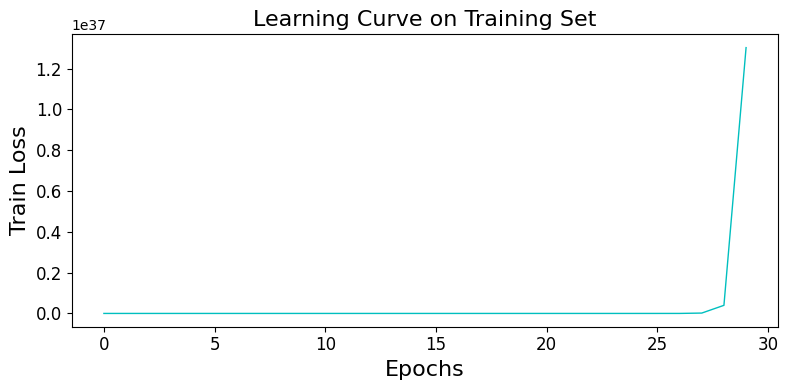

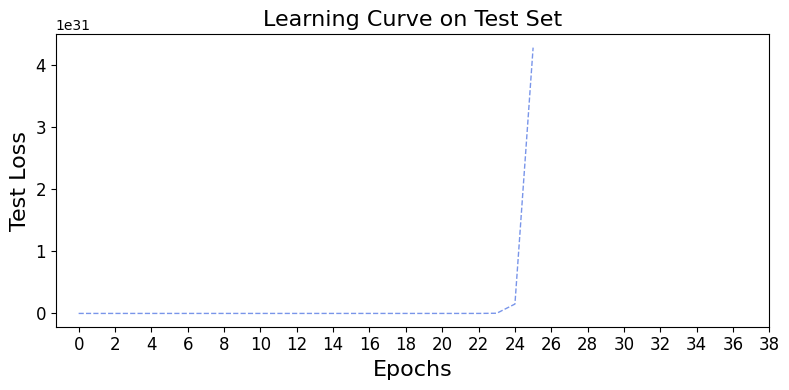

In [54]:
visLearningCurve(train_loss_log, test_loss_log)

### Calculate $R^2$ and MAE

In [55]:
import torch

# Assuming `model` is your PyTorch model
# Assuming `train_loader` and `test_loader` are your data loaders for training and test sets

def calculate_mae(model, data_loader):
    model.eval()
    total_mae = 0.0
    n_samples = 0

    with torch.no_grad():
        for x, y in data_loader:
            if torch.cuda.is_available():
               x, y = x.cuda(), y.cuda()
            pred_y = model(x)
            mae = torch.abs(pred_y - y).mean()
            total_mae += mae * x.size(0)
            n_samples += x.size(0)

    mean_mae = total_mae / n_samples
    return mean_mae.item()

def calculate_r2(model, data_loader,train_loader):
    model.eval()
    total_sst = 0.0
    total_ssr = 0.0
    n_samples = 0

    # Compute the mean of the y over the entire dataset
    y_mean = torch.cat([y for _, y in train_loader]).mean()
    with torch.no_grad():
        for x, y in data_loader:
            if torch.cuda.is_available():
               x, y = x.cuda(), y.cuda()
            pred_y = model(x)
            sst = torch.pow(y - y_mean, 2).sum()
            ssr = torch.pow(pred_y - y, 2).sum()
            total_sst += sst
            total_ssr += ssr
            n_samples += x.size(0)

    r_squared = 1 - (total_ssr / total_sst)
    return r_squared.item()

In [56]:
# Define Test Loader here
test_dataset = CustomDataset(ames_test_encoded)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [57]:
# Calculate MAE and R² for training set
train_mae = calculate_mae(lr_reg, train_loader)
train_r2 = calculate_r2(lr_reg, train_loader,train_loader)

# Calculate MAE and R² for test set
test_mae = calculate_mae(lr_reg, test_loader)
test_r2 = calculate_r2(lr_reg, test_loader,train_loader)

print(f"Training MAE: {train_mae}, Training R²: {train_r2}")
print(f"Test MAE: {test_mae}, Test R²: {test_r2}")

Training MAE: 7.853027983223151e+25, Training R²: -inf
Test MAE: 6.356467156121789e+25, Test R²: -inf


### Comparison with Statsmodels

In [58]:
import statsmodels.formula.api as smf
all_columns = "+".join(ames_train.columns.difference(["LogSalePrice"]))
my_formula = "LogSalePrice~" + all_columns +'-1'
print(my_formula)

mod_naive = smf.ols(my_formula, data=ames_train)
nlr = mod_naive.fit()

print(nlr.summary())

LogSalePrice~Alley+Artery+AsbShng+AsphShn+BedroomAbvGr+BldgType+BrkCmn+BrkComm+BrkFace+BsmtCond+BsmtExposure+BsmtFinSF1+BsmtFinSF2+BsmtFinType1+BsmtFinType2+BsmtFullBath+BsmtHalfBath+BsmtQual+BsmtUnfSF+CBlock+CemntBd+CentralAir+CmentBd+Electrical+EnclosedPorch+ExterCond+ExterQual+Feedr+Fence+FireplaceQu+Fireplaces+Foundation+FullBath+Functional+GarageArea+GarageCars+GarageCond+GarageFinish+GarageQual+GarageType+GrLivArea+HalfBath+HdBoard+Heating+HeatingQC+HouseStyle+ImStucc+KitchenAbvGr+KitchenQual+LandContour+LandSlope+LotArea+LotConfig+LotFrontage+LotShape+LowQualFinSF+MSSubClass+MSZoning+MasVnrArea+MasVnrType+MetalSd+MiscVal+MoSold+Neighborhood+Norm+OpenPorchSF+Other+OverallCond+OverallQual+PavedDrive+Plywood+PoolArea+PoolQC+PosA+PosN+PreCast+RRAe+RRAn+RRNe+RRNn+RoofMatl+RoofStyle+SaleCondition+SaleType+ScreenPorch+Stone+Street+Stucco+TotRmsAbvGrd+TotalBsmtSF+Utilities+VinylSd+WdSdng+WdShing+WdShng+WoodDeckSF+X1stFlrSF+X2ndFlrSF+X3SsnPorch+YearsSince1950Built+YearsSince1950GarageBui

In [59]:
def OSR2(y_train, y_test, y_pred):

    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)

    return (1 - SSE/SST)

def MAE(y_test, y_pred):

    return (np.mean(abs(y_test - y_pred)))

def print_metrics(model, X_train, y_train, X_test, y_test, flag_log_sale_price=False):

    if (flag_log_sale_price == True):

        y_pred_train = pd.Series(model.predict(X_train)).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).reset_index(drop=True)
        y_train = y_train.copy().reset_index(drop=True)
        y_test = y_test.copy().reset_index(drop=True)

        print("\nMetrics for Log(Sale Price):\n")

    elif (flag_log_sale_price == False):

        y_pred_train = pd.Series(model.predict(X_train)).apply(np.exp).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).apply(np.exp).reset_index(drop=True)
        y_train = y_train.copy().apply(np.exp).reset_index(drop=True)
        y_test = y_test.copy().apply(np.exp).reset_index(drop=True)

        print("\nMetrics for Sale Price:\n")

    print('Training R2', OSR2(y_train, y_train, y_pred_train))
    print('Training MAE', MAE(y_train, y_pred_train))

    print('Out-of-sample R2', OSR2(y_train, y_test, y_pred_test))
    print('Out-of-sample MAE', MAE(y_test, y_pred_test))

    return None

### Saving and Loading Checkpoint

Often, the training of the model might be lengthy. In this case, we can save a checkpoint for the model's training progress and resume the training progress later. We will show how to do this in pytorch.

In [60]:
y_train_sm = ames_train.iloc[:,0]
y_test_sm = ames_test.iloc[:,0]
print_metrics(nlr, ames_train, y_train_sm, ames_test, y_test_sm, flag_log_sale_price = True)


Metrics for Log(Sale Price):

Training R2 0.959221645198579
Training MAE 0.05810908101679366
Out-of-sample R2 0.8279251420816143
Out-of-sample MAE 0.08941158498770853


In [61]:
# Initialize model and optimizer
lr_reg = LinearRegression()
optimizer = torch.optim.SGD(lr_reg.parameters(), lr=learning_rate) # parameters() method is inherited from nn.Module

# Suppose we only train the first two epochs
first_num_epochs = 2
train_loss_log, test_loss_log = train_model(lr_reg, loss_func, first_num_epochs, optimizer, train_loader, x_test, y_test)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([989])) that is different to the input size (torch.Size([989, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  1,  Training Loss:    0.3860,  Test Loss:  0.7554
Epoch  2,  Training Loss:    0.6104,  Test Loss:  0.6363
Elapsed Time :    1.56


In [62]:
# Save the model and optimizer information
PATH = "model.pt"
torch.save({
            'epoch': 2,
            'model_state_dict': lr_reg.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss_log[-1],
            }, PATH)

In [63]:
# Initialize model and optimizer
lr_reg = LinearRegression()
optimizer = torch.optim.SGD(lr_reg.parameters(), lr=learning_rate) # parameters() method is inherited from nn.Module

checkpoint = torch.load(PATH)
lr_reg.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

<ipython-input-63-4c39c4df6ada>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(PATH)


In [64]:
# resume the training process
second_num_epochs = 18
train_loss_log, test_loss_log = train_model(lr_reg, loss_func, second_num_epochs, optimizer, train_loader, x_test, y_test)

Epoch  1,  Training Loss:    0.2545,  Test Loss:  0.5953
Epoch  2,  Training Loss:    0.1510,  Test Loss:  0.5409
Epoch  3,  Training Loss:    0.1505,  Test Loss:  0.5207
Epoch  4,  Training Loss:    0.1945,  Test Loss:  0.5038
Epoch  5,  Training Loss:    0.1139,  Test Loss:  0.4760
Epoch  6,  Training Loss:    0.1355,  Test Loss:  0.4616
Epoch  7,  Training Loss:    0.0977,  Test Loss:  0.4544
Epoch  8,  Training Loss:    0.0228,  Test Loss:  0.4338
Epoch  9,  Training Loss:    0.1499,  Test Loss:  0.4262
Epoch 10,  Training Loss:    0.0521,  Test Loss:  0.4205
Epoch 11,  Training Loss:    0.0896,  Test Loss:  0.4177
Epoch 12,  Training Loss:    0.0920,  Test Loss:  0.4083
Epoch 13,  Training Loss:    0.0696,  Test Loss:  0.3988
Epoch 14,  Training Loss:    0.0923,  Test Loss:  0.3949
Epoch 15,  Training Loss:    0.0544,  Test Loss:  0.3833
Epoch 16,  Training Loss:    0.0420,  Test Loss:  0.3892
Epoch 17,  Training Loss:    0.0754,  Test Loss:  0.3805
Epoch 18,  Training Loss:    0.

Indeed, we can periodaclly save the checkpoint during the training process.
 Let us slightly modify the train_model function.

In [65]:
import time

# Define a function for training.
def train_model_with_cp(model, loss_func, num_epochs, optim, train_loader, x_test, y_test):
  PATH = "model.pt"
  train_loss_log = []
  test_loss_log = []

  # Move model to GPU if CUDA is available
  if torch.cuda.is_available():
      model = model.cuda()
      x_test = x_test.cuda()
      y_test = y_test.cuda()
  tic = time.time()
  for epoch in range(1,num_epochs+1):
    for i, data in enumerate(train_loader):
      x, y = data
      # check if cuda is available
      if torch.cuda.is_available():
        x , y = x.cuda(), y.cuda()
      # get predicted y value from our current model
      pred_y = model(x)
      # calculate the loss
      loss = loss_func(pred_y,y)
      # Important: Zero the gradient of the optimizer
      optimizer.zero_grad()
      # Backward pass: Compute gradient of the loss with respect to model parameters
      loss.backward()
      # update weights
      optimizer.step()
      train_loss_log.append(loss.item())
    # change the model to evaluation mode to calculate the test loss; We will come back to this later after learning Dropout and Batch Normalization
    model.eval()
    test_pred_y = model(x_test)
    test_loss = loss_func(test_pred_y,y_test)
    test_loss_log.append(test_loss.item())
    # change back to training mode.
    model.train()
    print("Epoch {:2},  Training Loss: {:9.4f},  Test Loss: {:7.4f}".format(epoch, loss.item(), test_loss.item()))
    # For every 5-th epoch, save the checkpoint
    if epoch % 5 == 0:
      torch.save({
              'epoch': epoch,
              'model_state_dict': lr_reg.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'loss': train_loss_log[-1],
              }, PATH)
  toc = time.time()
  print("Elapsed Time : {:7.2f}".format(toc-tic))
  return train_loss_log, test_loss_log

In [66]:
# Initialize model and optimizer
lr_reg = LinearRegression()
optimizer = torch.optim.SGD(lr_reg.parameters(), lr=learning_rate) # parameters() method is inherited from nn.Module

# Suppose we only train the first two epochs
num_epochs = 20
train_loss_log, test_loss_log = train_model_with_cp(lr_reg, loss_func, num_epochs, optimizer, train_loader, x_test, y_test)

Epoch  1,  Training Loss:    0.5016,  Test Loss:  0.7587
Epoch  2,  Training Loss:    0.1179,  Test Loss:  0.6448
Epoch  3,  Training Loss:    0.1915,  Test Loss:  0.5930
Epoch  4,  Training Loss:    0.2147,  Test Loss:  0.5359
Epoch  5,  Training Loss:    0.1405,  Test Loss:  0.4861
Epoch  6,  Training Loss:    0.1149,  Test Loss:  0.4656
Epoch  7,  Training Loss:    0.1192,  Test Loss:  0.4506
Epoch  8,  Training Loss:    0.0535,  Test Loss:  0.4402
Epoch  9,  Training Loss:    0.0852,  Test Loss:  0.4355
Epoch 10,  Training Loss:    0.0688,  Test Loss:  0.4258
Epoch 11,  Training Loss:    0.0335,  Test Loss:  0.4182
Epoch 12,  Training Loss:    0.1548,  Test Loss:  0.4162
Epoch 13,  Training Loss:    0.0437,  Test Loss:  0.4069
Epoch 14,  Training Loss:    0.0462,  Test Loss:  0.3904
Epoch 15,  Training Loss:    0.0431,  Test Loss:  0.3867
Epoch 16,  Training Loss:    0.1146,  Test Loss:  0.3845
Epoch 17,  Training Loss:    0.0709,  Test Loss:  0.3848
Epoch 18,  Training Loss:    0.